In [ ]:
"""
<예측과 분류의 차이>
 - 일반적으로 분석에서 사용하는 용어는 "예측" 한다라고 표현...
 - 예측 : 우리가 모르는 값, 추정한 값을 추출하는 분석 
        : 데이터 형태는 숫자값을 이용(연속형 데이터라고 칭합니다.)
 - 분류 : 소속을 밝히기 위해, 판단을 위한 분석
        : 데이터 형태는 문자값을 이용(범주형 데이터라고 칭합니다.)
          (문자의 범주를 숫자로 변환해서 사용합니다.)

<학습 방법>
 - 지도 학습 방법 : 정답을 알려주고 하는 학습시키는 방법
   - 회귀분석(예측), 분류분석
   
 - 비지도 학습 방법 : 정답 없이 스스로 학습하는 방법
   - 군집분석(분류분석의 종류임)

<용어 정의>
 - 독립변수(x) : 특성=컬럼=항목=퓨처 데이터들, 즉 정답을 예측 또는 분류하는데 사용될 주변 데이터를 의미함
 - 종속변수(Y) : 예측 또는 분류분석의 최종 추출하고자하는 결과값을 의미함(정답)

<분석 과정>
 1. 데이터 수집
 2. 데이터 전처리(확인 후 이상 없으면 바로 진행)
 2.1. 데이터 현황분석(데이터 탐색을 위한 시각화-EDA(탐색적 데이터 분석))
 ----------------------------------------------
 3. 데이터 특성(컬럼=퓨처=항목)간의 상관관계 확인
    -> 선형관계 또는 수평관계의 산점도 확인
       --> 선형관계 분포 : 회귀분석 진행
       --> 수평(직)관계 분포 : 분류분석 진행
    -> 상관계수 확인(상관성이 있는지 확인)
 4. 특성들의 유의미성(p-value) 검증(또는 상관관계 검증이라고도 칭합니다.)
 5. 상관관계 검증에 따른 데이터 후처리(가공)
 6. 훈련하기
     - 훈련을 위한 데이터 전처리하기 : 데이터 분류하기
                                   : 훈련 vs 테스트 
                                   : 훈련 vs 검증 vs 테스트
     - 훈련모델(클래스) 생성
     - 훈련 시키기
     - 훈련 및 테스트(검증) 정확도(또는 결정계수) 확인
       (과대 또는 과소적합 여부 확인)
       -- 과대 또는 과소적합인 경우 튜닝 진행
          -- 튜닝(정규화, 특성늘리기 등등...전처리 수행)
     - 예측하기
     - 오차 확인하기(평가하기)
       -- 평균절대오차(MAE)
       -- 평균제곱오차(MSE)
       -- 결정계수(R2)
       --> 모델 성능은 결정계수가 높고, 오차가 낮은값을 선택
           (단, 전제조건은 일반화 되었다는 가정하에~)
 7. 훈련 시 사용된 특성들 중 훈련에 중요하게 사용된 특성들 확인
    --> 특성중요도라고 칭합니다.
 8. 중요한 특성들을 기준으로 5번부터 다시 수행해 보기
 9. 하이퍼파라메터 튜닝 (정확도-결정계수 성능 올리기)
    --> 튜닝 클래스 사용
 10. 각 분석 방법에 속한 전체 모델 적용
 11. 최종 모델 선정
    - 6번의 오차(MAE, MSE, R2)를 모델별로 비교하여 선정 
 12. 선정된 모델로 최종 테스트데이터로 예측 및 평가하기
 13. 선정된 모델 저장하기
 14. 서비스하고자하는 외부 프로그램에서 저장된 모델 불러들여서 사용하면 됨...
     - 외부 서비스하는 프로그램에서는 예측에 사용될 독립변수만 받아들이고,
     - 예측만 수행하면 됩니다.
     - 절대로, 서비스하는 곳에서는 모델을 훈련하거나 평가하면 안됩니다.
     - 웹(Web) 서비스를 하려면, Back-End 영역에 모델을 복사해서 넣은 후 사용
"""

### 데이터 읽어들이기

In [1]:
### 주택가격 데이터셋 읽어들이기
# 데이터프레임 변수명 : df_org
import pandas as pd

In [3]:
file_path = "./data/01_회귀_주택가격예측_데이터셋_Row_1000.csv"
df_org = pd.read_csv(file_path)
df_org.info()
df_org.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   면적          1000 non-null   float64
 1   층수          1000 non-null   int64  
 2   역까지_도보시간    1000 non-null   float64
 3   주변_편의시설_점수  1000 non-null   float64
 4   주택_가격       1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
0,121.146284,13,35.025575,9.100563,16601.16745


### 데이터 전처리(결측, 중복, 이상치 확인)

In [4]:
### RangeIndex의 갯수와 각 특성의 NonNull 갯수의 차이 확인
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   면적          1000 non-null   float64
 1   층수          1000 non-null   int64  
 2   역까지_도보시간    1000 non-null   float64
 3   주변_편의시설_점수  1000 non-null   float64
 4   주택_가격       1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [5]:
### 이상치 확인하기
df_org.describe()

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.258806,15.300000,28.935722,5.663576,18486.887415
std,49.173936,8.695379,17.148260,2.583594,10427.177312
min,36.276450,1.000000,1.034263,1.011372,1312.073187
25%,75.918038,8.000000,14.529759,3.446698,9587.864073
50%,118.338542,15.000000,27.478162,5.717975,16434.524871
75%,159.802495,23.000000,42.964969,7.935390,26276.908661
max,203.987011,30.000000,59.983704,9.994926,44167.392672


In [6]:
### 기초통계에서 이상유무 확인 후 
#    - 다시한번 시각화하여 확인
#    - 박스플롯으로 확인
### 기본 시각화 라이브러리

import matplotlib
import matplotlib.pyplot as plt

### 기본 시각화보다 고급스러운 스타일의 시각화 라이브러리
import seaborn as sns

### 시각화를 위한 font 지정(한글깨짐 방지)
from matplotlib import font_manager, rc

### 사용자의 OS(운영체제) 확인 가능한 라이브러리
import platform

### 한글 font 설정
plt.rc("font", family = "Malgun Gothic")

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

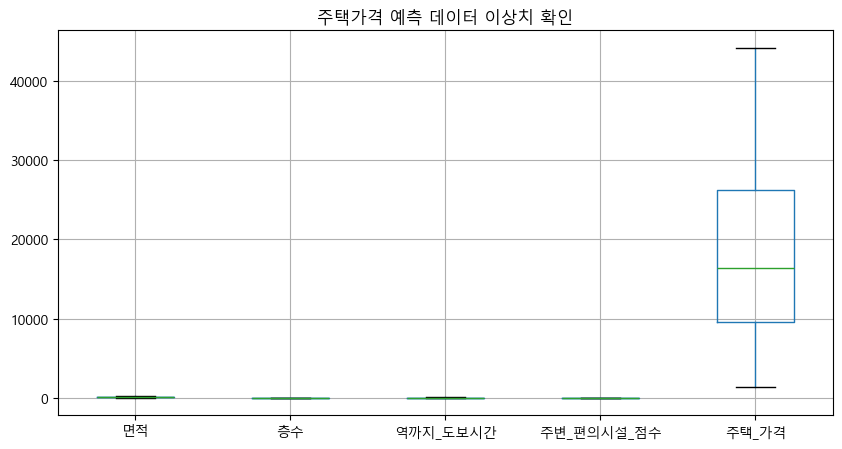

In [8]:
### 주택가격 예측 데이터 이상치 확인 그래프
# - 박스플롯

# 그래프 사이즈
plt.figure(figsize=(10, 5))
# 그래프 대제목
plt.title("주택가격 예측 데이터 이상치 확인")

# 박스플롯 그리기 : 데이터프레임에서 제공하는 시각화 함수 사용
df_org.boxplot()

# 그래프 그리기
plt.show()

In [10]:
### 중복데이터 확인하기
df_org[df_org.duplicated() == True]

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격


### 특성들 간의 관계 확인하기

In [ ]:
"""
<특성들 간의 관계 확인>
 - 상관관계 분석 : 선형성 또는 비선형성 확인
 - 상관관계는 표 또는 시각화로 확인 합니다.
 - 시각화의 경우 산점행렬도(산점도 그래프)를 사용
 - 산점행렬도 그래프는 -> 종속변수를 기준으로 독립변수들 간의 형태를 확인
 - 선형형태(회귀분석 진행), 비선형형태(분류분석 진행)
 - 상관관계는 값으로 확인 가능 -> 이 값을 상관관계 계수라고 칭합니다.
                             -> 상관관계 계수는 절대값으로 확인(0~1사이의 값으로 나타냄)
                             -> 1에 가까울 수록 상관관계가 높음
                             -> 0에 가까울 수록 상관관계가 낮음
                             -> 음수(-)인 값인 경우 반비례 형태의 산점도 분포를 보임
                             -> 양수(+)인 값인 경우 비례 형태의 산점도 분포를 보임
"""

In [12]:
### 상관관계 표 나타내기
# - 사용함수 : corr()
# - corr() 함수는 데이터프레임 내에서 제공되는 함수 입니다.
# - 확인하는 방법 : 왼쪽 상단에서 오른쪽 하단으로 대각선 값들은 모두 1입니다.
#                : 대각선 값들의 왼쫀편 또는 오른쪽편 한쪽만 보시면 됩니다.(좌우 대칭 값들입니다.)
corr_matrix = df_org.corr()
corr_matrix

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
면적,1.000000,0.058629,-0.025361,0.050418,0.963063
층수,0.058629,1.000000,-0.029001,-0.013287,0.229850
역까지_도보시간,-0.025361,-0.029001,1.000000,-0.003508,-0.117005
주변_편의시설_점수,0.050418,-0.013287,-0.003508,1.000000,0.091508
주택_가격,0.963063,0.229850,-0.117005,0.091508,1.000000


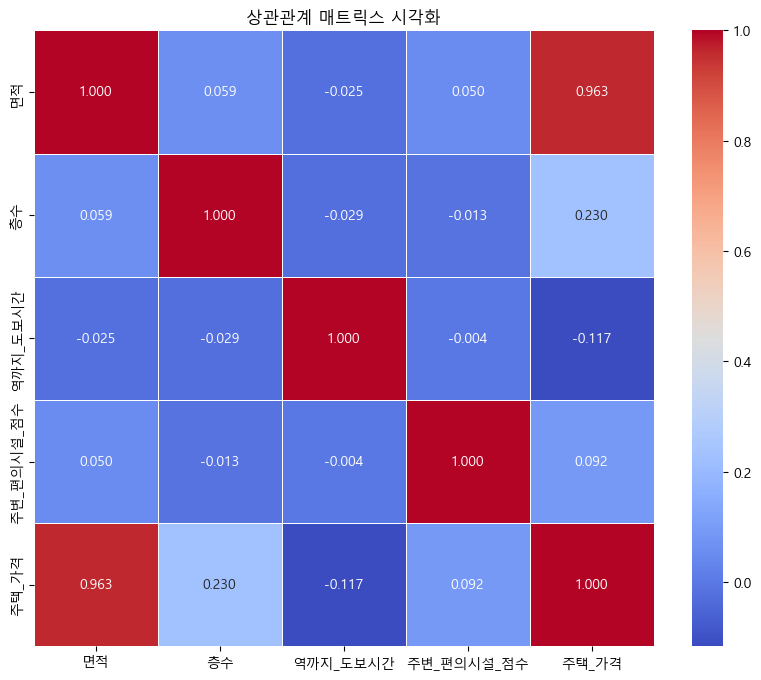

In [14]:
### 상관관계 표를 히트맵으로 시각화하기

# 그래프 사이트 정의
plt.figure(figsize=(10, 8))
# 제목
plt.title("상관관계 매트릭스 시각화")

### 히트맵 시각화
# - linewidths=0.5 : 각 사각형 사이의 경계선 두께
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5)

# 그리기
plt.show()

### 산점행렬도 그리기

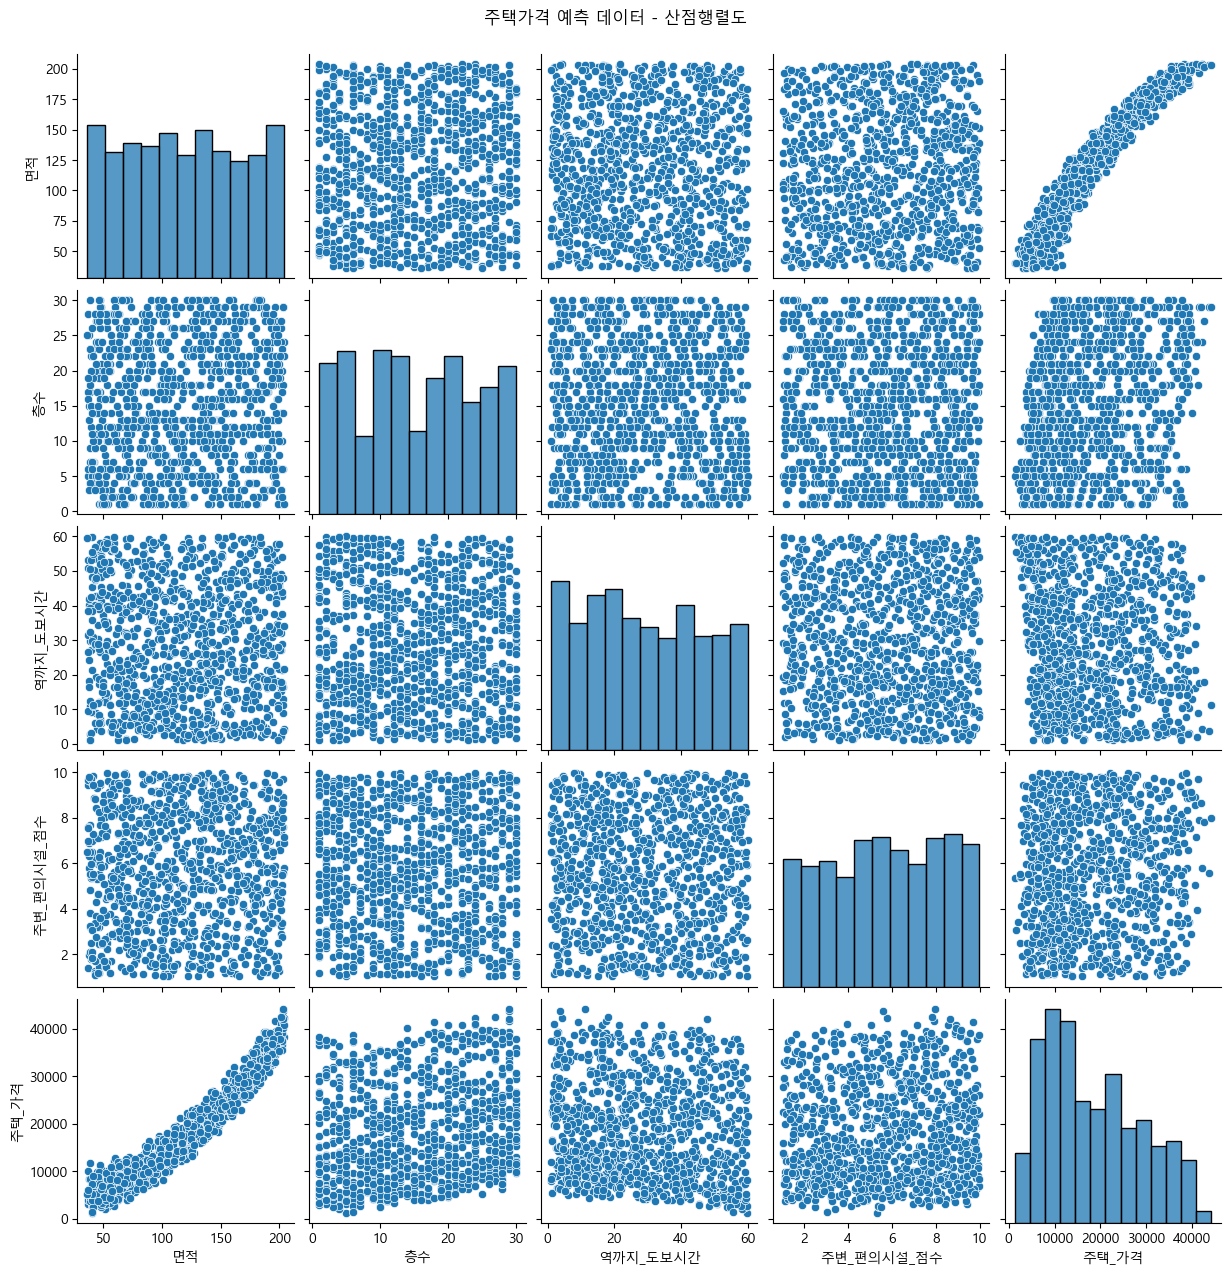

In [17]:
### 모든 특성들간에 점의 분포형태 확인
sns.pairplot(df_org)
plt.suptitle("주택가격 예측 데이터 - 산점행렬도", y=1.02)
plt.show()

### 상관관계 검증을 위해 독립변수(x)와 종속변수(Y)로 데이터 분리하기

In [18]:
df_org.head(1)

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
0,121.146284,13,35.025575,9.100563,16601.16745


In [21]:
### 원본 데이터에서 독립변수로 사용할 특성 추출하기
df_org.iloc[:, 0:4]
X = df_org.iloc[:, :-1]
X

,면적,층수,역까지_도보시간,주변_편의시설_점수
0,121.146284,13,35.025575,9.100563
1,69.040391,27,21.442580,2.792623
2,153.858939,8,10.174919,2.803478
3,71.656510,20,48.844439,1.983254
4,177.556747,4,2.466979,4.395939
...,...,...,...,...
995,109.964997,7,47.173178,7.412281
996,37.051580,19,38.339751,7.545630
997,69.009828,27,1.159038,3.559802
998,132.588140,23,15.994720,1.331994


In [22]:
### 종속변수(y) 추출하기 (종속변수의 형태는 1차원 형태로 사용됩니다.)
y = df_org["주택_가격"]
y

0      16601.167450
1      11420.654974
2      23286.484864
3       7535.429045
4      29848.361648
           ...     
995    12116.676007
996     6035.386052
997    12017.803413
998    20958.547577
999    14265.164818
Name: 주택_가격, Length: 1000, dtype: float64

In [ ]:
### <상관관계 검정하기>
# - 독립변수들의 특성들과 종속변수간에 "유의미성"이 있는지 확인하는 절차
# - 통계적 기법을 사용합니다.
# - 유의미성을 나타내는 단어 : p-value
# - p-value의 값을 : "유의미 계수"라고 칭합니다.

### <유의미 성의 기준 - 통계학에서 보편적으로 사용되는 기준임>
# p-value < 0.05 인 경우 : 유의미함
#                         (귀무가설 기각, 대립가설을 채택)
#                         (해당 데이터로 연구 계속 진행 가능)
# p-value >= 0.05인 경우 : 유의미하지 않음
#                         (귀무가설을 채택, 대립가설 기각)
#                         (해당 데이터로는 연구 불가)

### <유의미성의 해석 방법-글쓰기 방법>
# p-value < 0.05 인 경우 문서에 글을 쓰는 방법
#  - (잘못된 작성 예시)
#    p-value의 값이 0.05보다 작기 때문에 유의미하다고 판단됨
#  - (잘 작성된 예시)
#    p-value < 0.05 이므로 유의미하다고 판단됨

### <유의미한 값의 범위 기준>
# - 통계학에서는 보통 0.05를 기준으로 하지만(이론상),
# - 연구하고자하는 분야에서 기존 사용된 허용치가 없다면,
#   0.1~0.05 사이의 값도 사용되고 있음

### <상관관계 검정 방법>
# 1. 스피어만(Spearman) 상관관계 검정
#  - 선형 및 비선형 관계를 모두 포함하여 검정
#  - 특성 간의 선형관계의 방향성이 변화지 않고
#    일관되게 증가하거나 감소 또는  수평적 형태를 띄는 경우
#  - 보통 순위 형태의 데이터 특성 간의 관계 확인에 사용
#    (예시 : 시험 성적과 학업 성취도 간의 관계)
#    (시험 성적이 높을 수록, 학업 성취도도 높을까?)

# 2. 피어슨(Pearson) 상관관계 검정
#  - 선형적 형태를 띄는 경우에 주로 사용되는 방법
#  - 일반적으로 주로 사용되는 방법임
#  - 보통 양적 크기 형태의 데이터 특성 간의 관계 확인에 사용
#    (예시 : 온도와 아이스크림 판매량 간의 관계)
#    (날씨가 더우면, 아이스크림 판매량이 증가할까?)

### 스피어만 상관관계 검정

In [ ]:
"""
- 사용 패키지 : scipy.stats
- 사용 라이브러리 : spearmanr(끝에 r을 붙입니다.)
"""

In [23]:
    from scipy.stats import spearmanr

In [ ]:
### 각 독립변수별로 종속변수와 비교 하기
# - 독립변수 4개 
# - 반복해서 처리

In [25]:
### 독립변수 이름을 추출하기 --> 각 독립변수에 대해서 반복하기 위해서
x_columns_nm = X.columns
x_columns_nm

Index(['면적', '층수', '역까지_도보시간', '주변_편의시설_점수'], dtype='object')

In [26]:
### 샘플로 한개 독립변수와 종속변수 검정하기
x_columns_nm[0]

'면적'

In [30]:
### spearmanr(독립변수 1개, 종속변수)
spearmanr(X[x_columns_nm[0]], y)

### 결과값 해석
# - statistic : 상관관계 계수값
# - pvalue : 유의미 계수값(p-value 값)

# (해석)
# - 상관관계계수의 값 0.97로 독립변수는 종속변수와 관계성이 매우 높으며,
# - p-value < 0.05 이므로 유의미함
#   (이렇게 해석을 하시면 안됩니다. 
#     -> p-value의 유의미 계수값이 0.0으로 0.05보다 작으므로 유의미 함)

SignificanceResult(statistic=np.float64(0.9704259944259946), pvalue=np.float64(0.0))

In [33]:
### 독립변수의 갯수만큼 반복문을 이용해서 스피어만 상관관계 검정 값을 출력해 주세요
# - 각 독립변수에 대해서 출력...
for i in range(0, len(x_columns_nm), 1):
    print(x_columns_nm[i])

면적
층수
역까지_도보시간
주변_편의시설_점수


In [41]:
for col in x_columns_nm:
    # print(col)
    # print(spearmanr(X[col], y))
    s, p = spearmanr(X[col], y)
    # print(col, s, p)
    msg = f"""
        독립변수({col})와 종속변수(주택가격)의 상관관계 계수는 {s:.3f}이고, 
        p-value의 값은 {p:.3f} 입니다.
    """

    print(msg)


        독립변수(면적)와 종속변수(주택가격)의 상관관계 계수는 0.970이고, 
        p-value의 값은 0.000 입니다.
    

        독립변수(층수)와 종속변수(주택가격)의 상관관계 계수는 0.238이고, 
        p-value의 값은 0.000 입니다.
    

        독립변수(역까지_도보시간)와 종속변수(주택가격)의 상관관계 계수는 -0.131이고, 
        p-value의 값은 0.000 입니다.
    

        독립변수(주변_편의시설_점수)와 종속변수(주택가격)의 상관관계 계수는 0.091이고, 
        p-value의 값은 0.004 입니다.
    


### 피어슨 방식으로 상관관계 검정하기

In [ ]:
"""
- 사용 패키지 : scipy.stats
- 사용 라이브러리 : pearsonr
"""

In [42]:
from scipy.stats import pearsonr

In [ ]:
### 피어슨 방식도 스피어만 방식과 동일하게 사용됩니다.
# 라이브러리 이름만 다릅니다.

In [43]:
for col in x_columns_nm:
    # print(col)
    # print(pearsonr(X[col], y))
    s, p = pearsonr(X[col], y)
    # print(col, s, p)
    msg = f"""
        독립변수({col})와 종속변수(주택가격)의 상관관계 계수는 {s:.3f}이고, 
        p-value의 값은 {p:.3f} 입니다.
    """

    print(msg)


        독립변수(면적)와 종속변수(주택가격)의 상관관계 계수는 0.963이고, 
        p-value의 값은 0.000 입니다.
    

        독립변수(층수)와 종속변수(주택가격)의 상관관계 계수는 0.230이고, 
        p-value의 값은 0.000 입니다.
    

        독립변수(역까지_도보시간)와 종속변수(주택가격)의 상관관계 계수는 -0.117이고, 
        p-value의 값은 0.000 입니다.
    

        독립변수(주변_편의시설_점수)와 종속변수(주택가격)의 상관관계 계수는 0.092이고, 
        p-value의 값은 0.004 입니다.
    


In [ ]:
### (해석)
# - 주택가격 예측을 위해 사용하고자하는 모든 독립변수들과
#   종속변수와의 유의미성을 확인한 결과,
# - 모든 독립변수와 종속변수 간에는 p-value < 0.05로 
#   유의미 함을 나타내고 있음
# - 따라서, 주택가격 예측에 모든 독립변수를 사용하여
#   분석을 진행할 수 있음(모델 훈련에 사용 가능)

# 모델 훈련하기

### 모델 훈련을 위해 독립변수와 종속변수를
 - 훈련:검증:테스트 데이터로 분리해야 합니다. 

In [ ]:
"""
<변수 정의>
 - 훈련데이터에 대한 독립 및 종속변수   : X_train / y_train
 - 검증데이터에 대한 독립 및 종속변수   : X_val / y_val
 - 테스트데이터에 대한 독립 및 종속변수 : X_test / y_test

<데이터 분리 기준>
 - 정의된 기준은 없음, 일반적으로 사용되는 비율을 사용
 - 훈련:검증:테스트 = 6 : 2 : 2 or 8 : 1 : 1
 - 훈련:테스트      = 7 : 3 or 7.5 : 2.5 or 8 : 2
"""

### 훈련:검증:테스트 = 6:2:2로 데이터 분리하기

In [ ]:
"""
- 사용패키지 : sklearn.model_selection
- 사용라이브러리 : train_test_split
"""

In [44]:
from sklearn.model_selection import train_test_split

In [47]:
### train_test_split() 함수 사용하여 데이터 분리
# - 함수의 특징 : 2개씩만 분리 가능합니다.
#   --> 2개의 기준은 훈련(train) : 테스트(test) 기준입니다. 
# 훈련:검증:테스트 = 6:2:2
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

In [49]:
### shape : 차원으로 확인할 때 사용
# 독립변수는 2차원, 종속변수는 1차원을 사용합니다. (규칙 입니다.)
print(X_train.shape, y_train.shape, X_temp.shape, y_temp.shape)

(600, 4) (600,) (400, 4) (400,)


In [50]:
### temp 데이터를 이용해서 검증:테스트 = 2:2로 분리해야함
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [51]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(600, 4) (600,)
(200, 4) (200,)
(200, 4) (200,)


In [52]:
X_train

,면적,층수,역까지_도보시간,주변_편의시설_점수
24,147.720055,4,59.010382,8.423662
467,133.571978,18,36.130658,4.101974
539,76.228306,12,1.370025,4.171999
531,203.171102,18,9.040463,9.712274
618,118.390829,1,2.815335,4.943583
...,...,...,...,...
106,197.975016,25,53.018982,4.555207
270,126.034619,26,2.872185,5.268457
860,73.881485,29,36.328410,2.154055
435,148.191325,27,51.923694,9.518856


### 스케일링 작업하기
- 스케일링 : 정규화라고 칭합니다.

In [ ]:
"""
<스케일링=정규화 라이브러리>
 - 사용패키지 : sklearn.preprocessing
 - 사용라이브러리 : StandardScaler
 - 중요 : 스케일링은 독립변수에 대해서만 수행합니다. 
         (종속변수는 정답이기 때문에 원본을 그대로 사용)
"""

In [53]:
from sklearn.preprocessing import StandardScaler

In [55]:
### 정규화 클래스 생성하기(변환기라고 칭하기도 합니다.)
scaler = StandardScaler()
scaler

StandardScaler()

In [56]:
### 변환 패턴 찾기(패턴찾기 == 훈련하기)
# - 변환 패턴을 스스로 찾게 합니다.
# - 이때 사용하는 독립변수는 훈련데이터로만 합니다.
scaler.fit(X_train)

StandardScaler()

In [58]:
### 독립변수들(훈련, 검증, 테스트 모두) 변환시키기
X_train_scaled = scaler.transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [59]:
print(X_train_scaled.shape, y_train.shape)
print(X_val_scaled.shape, y_val.shape)
print(X_test_scaled.shape, y_test.shape)

(600, 4) (600,)
(200, 4) (200,)
(200, 4) (200,)


### 모델 훈련시키기

In [ ]:
"""
<모델 훈련에 사용하는 데이터>
 - 훈련데이터로 훈련(학습) 시킵니다.
 - 훈련이 완료된 후 검증 데이터를 이용해서 훈련을 잘 했는지 확인합니다.
 - 확인 방법 : 과적합(과대/과소 적합) 여부 확인합니다.
 - 과적합 판단 : 훈련 정확도가 검증 정확도보다 낮으면 ==> 과소적합 이라고 판단합니다. (훈련 못한 것)
 - 훈련 : 검증 : 테스트의 정확도 비교 ==> 훈련 > 검증 > 테스트 형태가 가장 이상적임
                                    ==> 훈련 > 검증 < 테스트인 경우도 있음
"""

In [ ]:
"""
<사용하는 모델>
 - 주택가격은 숫자의 연속된 종속변수값을 사용하기에 회귀모델을 사용합니다.
 1. LinearRegression (선형회귀모델)
 2. Ridgge(릿지 모델)
 3. Lasso(라쏘 모델)
 4. RandomforestRegressor(랜덤포레스트 모델, RF모델)
 5. GradientBoostingRegressor(그레디언트 부스팅 모델, GB모델)
 6. HistGradientBoostingRegressor(히스트 그레디언트 부스팅 모델, HGB모델)
 7. xgboost (엑스지부스트, 보통 XGB 모델이라고 칭합니다.)

<성능 차이>
 - 가장 낮은 성능 : 1번
 - 중간 성능 : 2, 3번
 - 높은 성능 : 4, 5번
 - 매우 높은 성능 : 6, 7번
 
 ** 다만 데이터의 특성에 따라서 성능의 차이는 다를 수 있음
"""